# Code for running SiameseNet and TripletNet on BRACOL Dataset

***The code used in this notebook is mostly from [this](https://github.com/adambielski/siamese-triplet/). If you are interested in it, check it out, it is extremely well documented***

***Install libs***

In [1]:
import sys
sys.path.insert(0,'f:/Meysam-Khodarahi/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/src/')
import torch
from transformers import ViTForImageClassification, ViTFeatureExtractor
from dataloaders import get_train_transforms, get_val_transforms, get_triplet_dataloader
from networks import TripletNet 
from models import MobileNetv2
from models import EfficientNetB4
from losses import TripletLoss
from trainer import fit
import torchvision
import timm
from IPython.display import clear_output 
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.manifold import TSNE
from torch import nn
from torch.optim.lr_scheduler import CosineAnnealingLR
from sklearn.metrics import accuracy_score, f1_score , precision_score , recall_score

# استفاده از مدل EfficientNet به جای MobileNetv2 برای استخراج ویژگی‌ها
embedding_net =EfficientNetB4() #timm.create_model('efficientnet_b0', pretrained=True)  # استفاده از مدل EfficientNet
siamese_model = TripletNet(embedding_net=embedding_net)

optimizer = torch.optim.Adam(siamese_model.parameters(), lr=1e-4)  # تغییر به Adam برای بهبود عملکرد
lr_scheduler = CosineAnnealingLR(optimizer, T_max=10, eta_min=1e-6)  # استفاده از Cosine Annealing برای تغییر نرخ یادگیری
loss_fn = TripletLoss(1.)
n_epochs = 100  # تعداد epochs
device = torch.cuda.is_available()
siamese_model.cuda()
if device:
    siamese_model.cuda()

Loaded pretrained weights for efficientnet-b4


***Import some libs***

In [2]:
# بارگذاری داده‌ها
path_data = 'f:/Meysam-Khodarahi/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/src/dataset'
triplet_train_loader = get_triplet_dataloader(root=path_data + '/train/', batch_size=5, transforms=get_train_transforms())
triplet_val_loader = get_triplet_dataloader(root=path_data + '/val/', batch_size=5, transforms=get_val_transforms())




***Define model hiperparams***

In [3]:

# آموزش مدل Siamese
fit(triplet_train_loader, triplet_val_loader, siamese_model, loss_fn, optimizer, lr_scheduler, n_epochs, device, log_interval=10)


Train: [0/225 (0%)]	Loss: 0.858277
Train: [50/225 (22%)]	Loss: 0.885962
Train: [100/225 (44%)]	Loss: 0.788791
Train: [150/225 (67%)]	Loss: 0.780847
Train: [200/225 (89%)]	Loss: 0.659361
Epoch: 1/100. Train set: Average loss: 0.7757
Epoch: 1/100. Validation set: Average loss: 0.7210
Estimated time of epoch: 58.54 s
ETA:97.57 min
Train: [0/225 (0%)]	Loss: 0.813708
Train: [50/225 (22%)]	Loss: 0.730741
Train: [100/225 (44%)]	Loss: 0.608149
Train: [150/225 (67%)]	Loss: 0.547794
Train: [200/225 (89%)]	Loss: 0.488474
Epoch: 2/100. Train set: Average loss: 0.5906
Epoch: 2/100. Validation set: Average loss: 0.6241
Estimated time of epoch: 57.62 s
ETA:95.07 min
Train: [0/225 (0%)]	Loss: 0.513581
Train: [50/225 (22%)]	Loss: 0.428206
Train: [100/225 (44%)]	Loss: 0.458982
Train: [150/225 (67%)]	Loss: 0.543897
Train: [200/225 (89%)]	Loss: 0.472678
Epoch: 3/100. Train set: Average loss: 0.4513
Epoch: 3/100. Validation set: Average loss: 0.5587
Estimated time of epoch: 56.75 s
ETA:92.69 min
Train: [0/

C:\Users\pc\AppData\Local\Temp\ipykernel_5448\1153100968.py:72: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  siamese_model = torch.load("f:/Meysam-Khodarahi/PlantDiseaseDia

siamese_model
model
train


C:\Users\pc\anaconda3\lib\site-packages\torch\nn\functional.py:5560: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


Epoch [10/100], Loss: 0.0146
Epoch [20/100], Loss: 0.0028
Epoch [30/100], Loss: 0.0012
Epoch [40/100], Loss: 0.0007
Epoch [50/100], Loss: 0.0006
Epoch [60/100], Loss: 0.0005
Epoch [70/100], Loss: 0.0004
Epoch [80/100], Loss: 0.0004
Epoch [90/100], Loss: 0.0003
Epoch [100/100], Loss: 0.0003
Accuracy: 0.8540, F1 Score: 0.8550
Precision Score: 0.844141340979964
Recall Score: 0.867355288484447
Model training and evaluation completed.


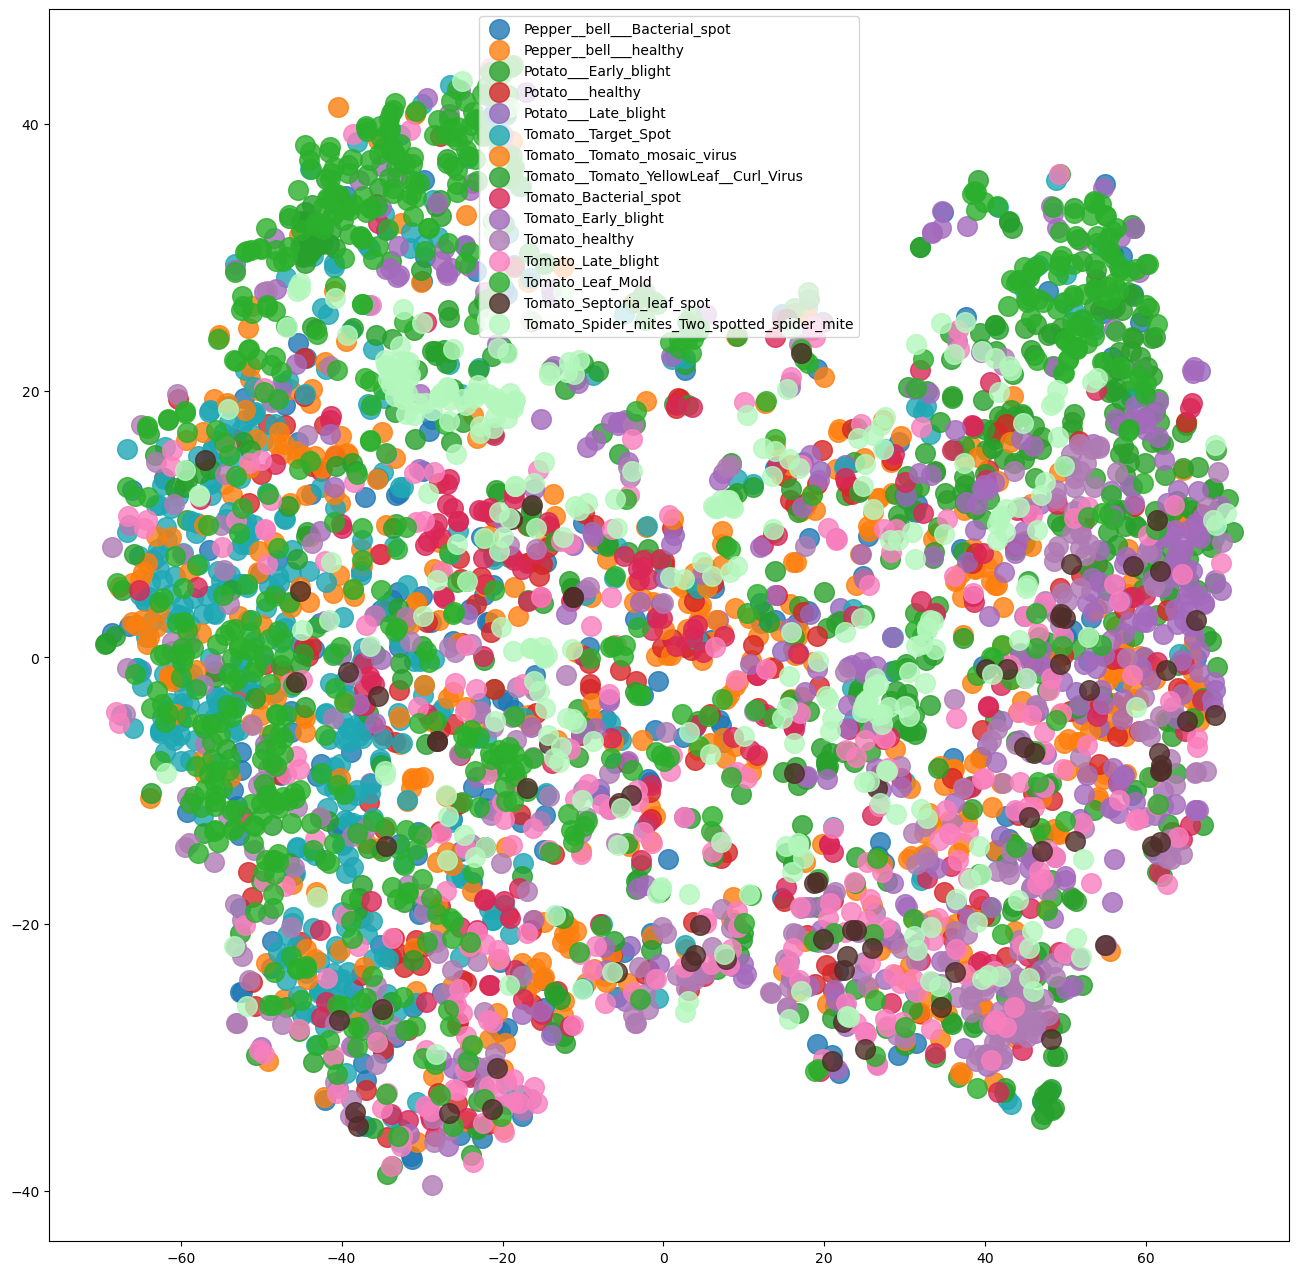

In [1]:
import sys
sys.path.insert(0,'f:/Meysam-Khodarahi/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/src/')
import cv2
import torchvision
from torch import nn
import numpy as np
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchvision import transforms
from torch.autograd import Variable
import os
import pandas as pd
import seaborn as sns
from dataloaders import get_train_transforms, get_val_transforms, get_triplet_dataloader
from transformers import ViTForImageClassification, ViTFeatureExtractor
import torch
from sklearn.metrics import accuracy_score, f1_score , precision_score , recall_score
from sklearn.manifold import TSNE
path_data = 'f:/Meysam-Khodarahi/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/src/dataset'
device = torch.cuda.is_available()
# استخراج ویژگی‌ها با استفاده از مدل Siamese
#def generate_embeddings(data_loader, model):
#    with torch.no_grad():
#        #device = 'cuda'
#        model.eval()
#        #model.to(device)
#        labels = None
#        embeddings = None
#        for batch_idx, data in tqdm(enumerate(data_loader)):
#            batch_imgs, batch_labels = data
#            batch_labels = batch_labels.numpy()
#           # batch_imgs = Variable(batch_imgs.to('cuda'))
#            batch_E = model.get_embedding(batch_imgs)
#            batch_E = batch_E.data.cpu().numpy()
#            embeddings = np.concatenate((embeddings, batch_E), axis=0) if embeddings is not None else batch_E
#            labels = np.concatenate((labels, batch_labels), axis=0) if labels is not None else batch_labels
#    return embeddings, labels
def generate_embeddings(data_loader, model):
    with torch.no_grad():
        #device = 'cuda'
        model.eval()
        #model.to(device)
        embeddings = []
        labels = []
        for batch_imgs, batch_labels in data_loader:
            if device:
                batch_imgs = batch_imgs.cuda()
            batch_E = model.get_embedding(batch_imgs)
            embeddings.append(batch_E.cpu().numpy())
            labels.append(batch_labels.numpy())
    return np.concatenate(embeddings), np.concatenate(labels)

def vis_tSNE(embeddings, labels, backbone='Convnet'):
    num_samples = embeddings.shape[0]
    X_embedded = TSNE(n_components=2).fit_transform(embeddings[0:num_samples, :])
    plt.figure(figsize=(16, 16))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#1fa7b4', '#fb7f0e', '#27a02c', '#da2758', '#a46abd','#af7bb4', '#fa7fbe', '#2baf2c', '#4f2d28', '#b4f7bd']
    labels_name = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight','Tomato__Target_Spot','Tomato__Tomato_mosaic_virus','Tomato__Tomato_YellowLeaf__Curl_Virus','Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_healthy','Tomato_Late_blight','Tomato_Leaf_Mold','Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite']
    for i in range(16):
        inds = np.where(labels==i)[0]
        plt.scatter(X_embedded[inds,0], X_embedded[inds,1], alpha=.8, color=colors[i], s=200)
    # plt.title(f't-SNE', fontweight='bold', fontsize=24)
    plt.legend(labels_name, fontsize=30)
    plt.savefig(f'./tsne_{backbone}.png')

# ذخیره مدل
#torch.save(siamese_model.state_dict(), "f:/Meysam-Khodarahi/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/siamese_model_EmbeddingGEnerator_State_improved.h5")
#torch.save(siamese_model , "f:/Meysam-Khodarahi/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/siamese_model_EmbeddingGEnerator.h5")

siamese_model = torch.load("f:/Meysam-Khodarahi/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/siamese_model_EmbeddingGEnerator.h5",map_location=torch.device('cuda'))
siamese_model.eval() 
print("siamese_model")
# تعریف مدل سفارشی ViT
 
# class RefinedViT(nn.Module):
#     def __init__(self, original_vit_model, embedding_dim, num_classes):
#         super(RefinedViT, self).__init__()
#         # حذف لایه‌های ابتدایی
#         self.vit = nn.Sequential(*list(original_vit_model.children())[2:])  # لایه‌های ابتدایی حذف شده
#         #self.fc = nn.Linear(embedding_dim, num_classes)  # لایه نهایی برای طبقه بندی
#         #self.fc = nn.Linear(1280, num_classes)  # لایه نهایی برای طبقه بندی
#         self.fc = nn.Linear(1792, num_classes)
#         self.dropout = nn.Dropout(0.5)
#     def forward(self, x):
#         x = self.vit(x)
#         x = self.dropout(x)
#         x = self.fc(x)
#         return x    

class RefinedViT(nn.Module):
    def __init__(self, original_vit_model,embedding_dim,  num_classes):
        super(RefinedViT, self).__init__()
        # حفظ لایه‌های اصلی ViT
        self.num_patches = (224 // 16) * (224 // 16)  # برای تصویر 224x224 با پچ 16x16
        self.embed_dim = 768  # سایز استاندارد برای vit-base
        
        # تبدیل embedding به پچ‌ها
        self.embedding_to_patch = nn.Linear(1792, self.num_patches * self.embed_dim)
       # self.embedding_to_patch = nn.Linear(1280, self.num_patches * self.embed_dim)
        #self.embedding_to_patch = nn.Linear(embedding_dim,  self.num_patches * self.embed_dim)
        
        # Position Embedding
        self.pos_embed = nn.Parameter(torch.zeros(1, self.num_patches + 1, self.embed_dim))
        
        # CLS Token
        self.cls_token = nn.Parameter(torch.zeros(1, 1, self.embed_dim))
        
        # Transformer Encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=self.embed_dim,
            nhead=12,  # تعداد heads در self-attention
            dim_feedforward=3072,
            dropout=0.1,
            activation='gelu',
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=12)
        
        # لایه‌های نهایی
        self.norm = nn.LayerNorm(self.embed_dim)
        self.fc = nn.Linear(self.embed_dim, num_classes)
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        batch_size = x.size(0)
        
        # تبدیل embedding به پچ‌ها
        x = self.embedding_to_patch(x)  # (batch_size, num_patches * embed_dim)
        x = x.view(batch_size, self.num_patches, self.embed_dim)  # (batch_size, num_patches, embed_dim)
       
        # اضافه کردن CLS token
        cls_tokens = self.cls_token.expand(batch_size, -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)  # (batch_size, num_patches + 1, embed_dim)
        
        # اضافه کردن position embedding
        x = x + self.pos_embed
        
        # Transformer Encoder
        x = self.transformer_encoder(x)
        
        # استفاده از CLS token برای طبقه‌بندی
        x = x[:, 0]  # فقط CLS token
        x = self.norm(x)
        x = self.dropout(x)
        x = self.fc(x)
        
        return x  
    def get_embedding(self, x):
        """
        دریافت embedding برای استفاده در t-SNE
        """
        batch_size = x.size(0)
        
        # تغییر شکل ورودی
        if len(x.shape) == 4:
            x = x.view(batch_size, -1)  # تبدیل به بردار یک‌بعدی
        
        # تغییر ابعاد برای تطابق با عملیات ضرب ماتریسی
        x = x.reshape(batch_size, 1792, -1)  # تقسیم 150528 به 1792 و باقیمانده
        x = x.mean(dim=-1)  # میانگین‌گیری روی بعد آخر
        
        # حالا x دارای ابعاد (batch_size, 1792) است
        x = self.embedding_to_patch(x)  # عملیات خطی
        x = x.view(batch_size, self.num_patches, self.embed_dim)
        
        # اضافه کردن CLS token
        cls_tokens = self.cls_token.expand(batch_size, -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)
        
        # اضافه کردن position embedding
        x = x + self.pos_embed
        
        # Transformer Encoder
        x = self.transformer_encoder(x)
        
        # استفاده از CLS token
        x = x[:, 0]
        x = self.norm(x)
        
        return x
 
    
# class RefinedViT(nn.Module):
#     def __init__(self, original_vit_model, embedding_dim, num_classes):
#         super(RefinedViT, self).__init__()
#         self.vit = nn.Sequential(*list(original_vit_model.children())[2:])
#         self.fc = nn.Linear(1792, num_classes)
#         self.dropout = nn.Dropout(0.5)
#         # تعریف Positional Embedding
#         self.positional_embedding = nn.Parameter(torch.zeros(1, num_patches + 1, embedding_dim))
    
#     def forward(self, x):
#         # اضافه کردن Positional Embedding
#         x = x + self.positional_embedding
#         x = self.vit(x)
#         x = self.dropout(x)
#         x = self.fc(x)
#         return x     

train_data = torchvision.datasets.ImageFolder(root=path_data + '/train/', transform=get_val_transforms())
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32)

test_data = torchvision.datasets.ImageFolder(root=path_data + '/test/', transform=get_val_transforms())
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32)

# بارگذاری مدل ViT از Hugging Face
vit_model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
vit_model.classifier = torch.nn.Linear(vit_model.config.hidden_size, 15)  # تعداد کلاس‌ها

embedding_dim = vit_model.config.hidden_size  # ابعاد embedding
model = RefinedViT(vit_model, embedding_dim, num_classes=15)
print("model")
# استخراج ویژگی‌ها از داده‌های آموزش
train_embeddings, train_labels = generate_embeddings(train_loader, siamese_model )
# استخراج ویژگی‌ها از داده‌های تست
test_embeddings, test_labels = generate_embeddings(test_loader, siamese_model )
 
# تبدیل داده‌ها به تنسور
X_train, y_train = train_embeddings, train_labels
X_val, y_val = test_embeddings, test_labels

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# انتقال مدل به دستگاه CUDA
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if torch.cuda.is_available():
    model.cuda()

# تنظیمات loss function و optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)  # استفاده از AdamW
###############################
# تنظیمات مدل
#vit_model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
#embedding_dim = vit_model.config.hidden_size  # ابعاد embedding
#model = RefinedViT(vit_model,embedding_dim ,num_classes=15)

# انتقال به GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

# تنظیمات آموزش
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=1000)
print("train")
# آموزش
model.train()
for epoch in range(100):
    optimizer.zero_grad()
    outputs = model(X_train_tensor.to(device))
    loss = criterion(outputs, y_train_tensor.to(device))
    loss.backward()
    optimizer.step()
    scheduler.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/100], Loss: {loss.item():.4f}')
########################################
# # آموزش مدل
# model.train()
# for epoch in range(1000):  # تعداد epochs
#     optimizer.zero_grad()
#     outputs = model(X_train_tensor.to(device))
#     loss = criterion(outputs, y_train_tensor.to(device))
#     loss.backward()
#     optimizer.step()
#     lr_scheduler.step()  # اعمال تغییرات در نرخ یادگیری
#     print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')

torch.save(model,"f:/Meysam-Khodarahi/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/RVIT_improved.h5");
 
# ارزیابی مدل
model.eval()
with torch.no_grad():
    val_outputs = model(X_val_tensor.to(device))
    _, predicted = torch.max(val_outputs.data, 1)

# ذخیره مدل
torch.save(model.state_dict(), "f:/Meysam-Khodarahi/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/RVIT_State_improved.h5")
 


# محاسبه دقت و امتیاز F1
accuracy = accuracy_score(y_val_tensor.cpu(), predicted.cpu())
f1 = f1_score(y_val_tensor.cpu(), predicted.cpu(), average='weighted')
precision = precision_score(y_val_tensor.cpu(), predicted.cpu(), average='macro') 
recall = recall_score(y_val_tensor.cpu(), predicted.cpu(), average='macro')

# نمایش نتایج
print(f'Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}')
print(f'Precision Score: {precision}')
print(f'Recall Score: {recall}')

# ذخیره مدل
# torch.save(model.state_dict(), "f:/Meysam-Khodarahi/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/RVIT_State_improved.h5")
# torch.save(model , "f:/Meysam-Khodarahi/PlantDiseaseDiagnosisFewShotLearning/siamese_triplet_net/RVIT_improved.h5")

# تابع تولید Embedding‌ها
def generate_embeddings(data_loader, model):
    with torch.no_grad():
        model.eval()
        embeddings = []
        labels = []
        for batch_imgs, batch_labels in data_loader:
            if device:
                batch_imgs = batch_imgs.cuda()
            batch_E = model.get_embedding(batch_imgs)  # استخراج ویژگی‌ها
            embeddings.append(batch_E.cpu().numpy())
            labels.append(batch_labels.numpy())
    return np.concatenate(embeddings), np.concatenate(labels)

# تابع vis_tSNE برای نمایش ویژگی‌ها
def vis_tSNE(embeddings, labels, backbone='EfficientNet'):
    num_samples = embeddings.shape[0]
    X_embedded = TSNE(n_components=2).fit_transform(embeddings[0:num_samples, :])
    plt.figure(figsize=(16, 16))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#1fa7b4', '#fb7f0e', '#27a02c', '#da2758', '#a46abd','#af7bb4', '#fa7fbe', '#2baf2c', '#4f2d28', '#b4f7bd']
    labels_name = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight','Tomato__Target_Spot','Tomato__Tomato_mosaic_virus','Tomato__Tomato_YellowLeaf__Curl_Virus','Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_healthy','Tomato_Late_blight','Tomato_Leaf_Mold','Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite']
    for i in range(15):
        inds = np.where(labels==i)[0]
        plt.scatter(X_embedded[inds,0], X_embedded[inds,1], alpha=.8, color=colors[i], s=200)
    plt.legend(labels_name, fontsize=10)
    plt.savefig(f'./tsne_{backbone}.png')

# نمایش t-SNE برای داده‌های تست
test_data = torchvision.datasets.ImageFolder(root=path_data + '/test/', transform=get_val_transforms())
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32)
#val_embeddings_cl, val_labels_cl = generate_embeddings(test_loader, siamese_model)
val_embeddings_cl, val_labels_cl = generate_embeddings(test_loader, model)
vis_tSNE(val_embeddings_cl, val_labels_cl)

# نتیجه نهایی
print("Model training and evaluation completed.")